In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt

# 한글 폰트 설정하기
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [2]:
online_sales = pd.read_csv('Onlinesales_info.csv')
customers_data = pd.read_csv('Customer_info.csv')
discount_coupon = pd.read_csv('Discount_info.csv')
marketing_spend = pd.read_csv('Marketing_info.csv')
tax_amount = pd.read_csv('Tax_info.csv')

In [3]:
online_sales.head(5)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [4]:
customers_data.head(5)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


findfont: Font family ['MaruBuri'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg

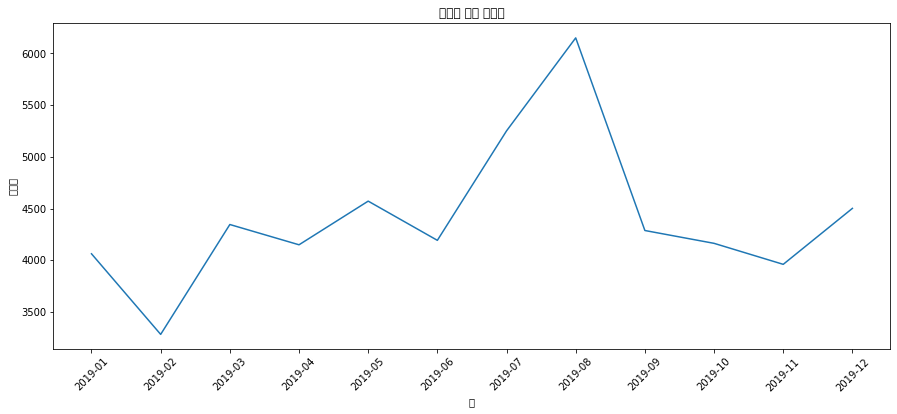

In [5]:
#시간에 따른 거래량
# 'Transaction_Date' 컬럼을 날짜 타입으로 변환하고 월별로 집계
# 'Month' 컬럼으로 거래량 계산
counts_by_month = online_sales.assign(Month=pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()

# 시간에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x=counts_by_month.index.astype(str), y=counts_by_month.values)
plt.title('시간에 따른 거래량')
plt.xlabel('월')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

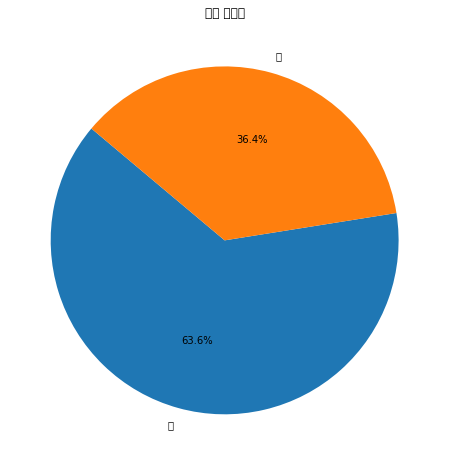

In [6]:
gender_counts = customers_data['성별'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # 원그래프 그리기
plt.title('성별 시각화')  # 그래프 제목 설정
plt.show()  # 그래프 보여주기